# Checking TI symmetry of ansatz

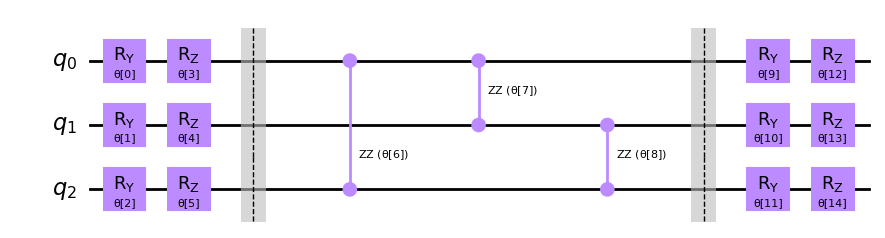

In [1]:

# Ansatz 

from qiskit.circuit.library import TwoLocal

n_layers=1
n_qubits=3
ansatz=TwoLocal(n_qubits, ['ry','rz'], 'rzz', 'circular', reps=n_layers, insert_barriers=True)
ansatz.decompose().draw('mpl')


In [2]:
# make them Translationally invariant
import numpy as np

np.random.seed(15)
num_pars = len(ansatz.parameters)//n_qubits
init_guess=np.random.rand(num_pars) # Number params that we want to optimize

parameters = np.repeat(init_guess,n_qubits)
print('TI parameters:',parameters)
circuit = ansatz.assign_parameters(parameters)

TI parameters: [0.8488177  0.8488177  0.8488177  0.17889592 0.17889592 0.17889592
 0.05436321 0.05436321 0.05436321 0.36153845 0.36153845 0.36153845
 0.27540093 0.27540093 0.27540093]


In [3]:
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

psi = qi.Statevector.from_instruction(circuit)
# Density matrix
rho = qi.DensityMatrix(psi)

# Reduced density matrix 
# for two qubits (a,b), finding the RDM rho_a is taking partial trace over b

rho_01 = qi.partial_trace(rho,[2])
rho_12 = qi.partial_trace(rho,[0])

In [4]:
print("reduced density matrix on qubit 0,1 :")
rho_01.draw('latex') 

reduced density matrix on qubit 0,1 :


<IPython.core.display.Latex object>

In [5]:
print("reduced density matrix on qubit 1,2 :")
rho_12.draw('latex') 


reduced density matrix on qubit 1,2 :


<IPython.core.display.Latex object>

In [12]:
rho_12==rho_01

True

We can even change the order of entangling gates and check : 

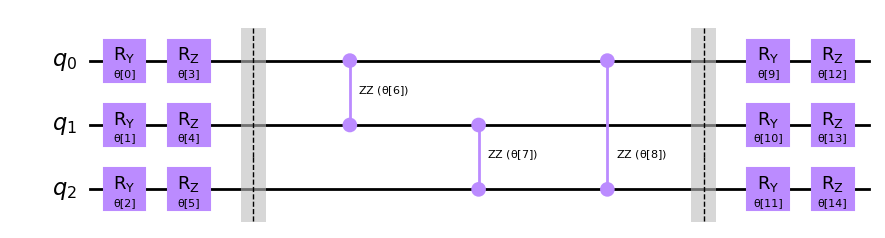

In [6]:
entangler_map = [(0, 1), (1, 2), (2, 0)]
ansatz2=TwoLocal(n_qubits, ['ry','rz'], 'rzz', entangler_map, reps=n_layers, insert_barriers=True)
circuit2= ansatz2.assign_parameters(parameters)
ansatz2.decompose().draw('mpl')

In [7]:
psi2 = qi.Statevector.from_instruction(circuit2)

rho = qi.DensityMatrix(psi2)

rho_01 = qi.partial_trace(rho,[2])
rho_12 = qi.partial_trace(rho,[0])

In [8]:
print("reduced density matrix on qubit 0,1 :")
rho_01.draw('latex') 

reduced density matrix on qubit 0,1 :


<IPython.core.display.Latex object>

In [9]:
print("reduced density matrix on qubit 1,2 :")
rho_12.draw('latex') 

reduced density matrix on qubit 1,2 :


<IPython.core.display.Latex object>

In [11]:
rho_12==rho_01

True